

> # **import libraries**



In [1]:
# read data lib
import numpy as np
import pandas as pd
from typing import List, Dict

# Visulalization & Preprocessing data lib
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data split 
from sklearn.model_selection import train_test_split

# Model Building
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from sklearn.cluster import DBSCAN
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid




> 
# **Read data & get information**



In [2]:
data = pd.read_csv("/content/Customer_Data (1).csv")
data[:5]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000




> # **Visulalization & Preprocessing data**



In [5]:
# Drop column [CUST_ID]
data.drop('CUST_ID', inplace=True, axis=1)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


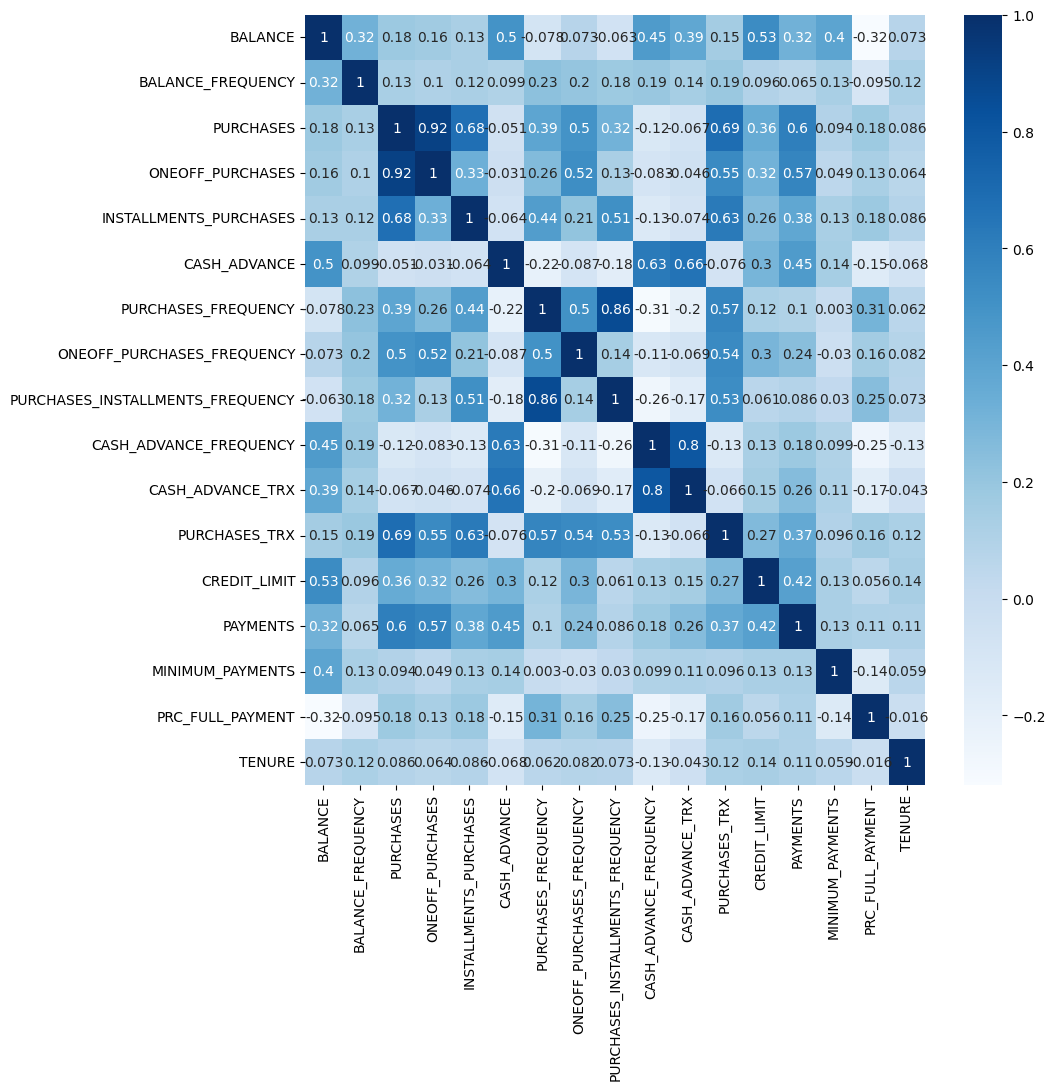

In [6]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True,cmap='Blues')
plt.show()

In [7]:
def correlation_above_threshold(df, threshold=0.6):
    corr_matrix = df.corr()
    corr_dict = {}
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) >= threshold:
                col_i = corr_matrix.columns[i]
                col_j = corr_matrix.columns[j]
                corr_dict[col_i + ' :  ' + col_j] = corr_value
    return pd.DataFrame(list(corr_dict.items()), columns=['columns','correlation'])

In [8]:
correlation_above_threshold(data,threshold=0.6)

,columns,correlation
0,ONEOFF_PURCHASES : PURCHASES,0.916845
1,INSTALLMENTS_PURCHASES : PURCHASES,0.679896
2,PURCHASES_INSTALLMENTS_FREQUENCY : PURCHASES_...,0.862934
3,CASH_ADVANCE_FREQUENCY : CASH_ADVANCE,0.628522
4,CASH_ADVANCE_TRX : CASH_ADVANCE,0.656498
5,CASH_ADVANCE_TRX : CASH_ADVANCE_FREQUENCY,0.799561
6,PURCHASES_TRX : PURCHASES,0.689561
7,PURCHASES_TRX : INSTALLMENTS_PURCHASES,0.628108
8,PAYMENTS : PURCHASES,0.603264


<ipython-input-9-262c716a8436>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,3,i+1)


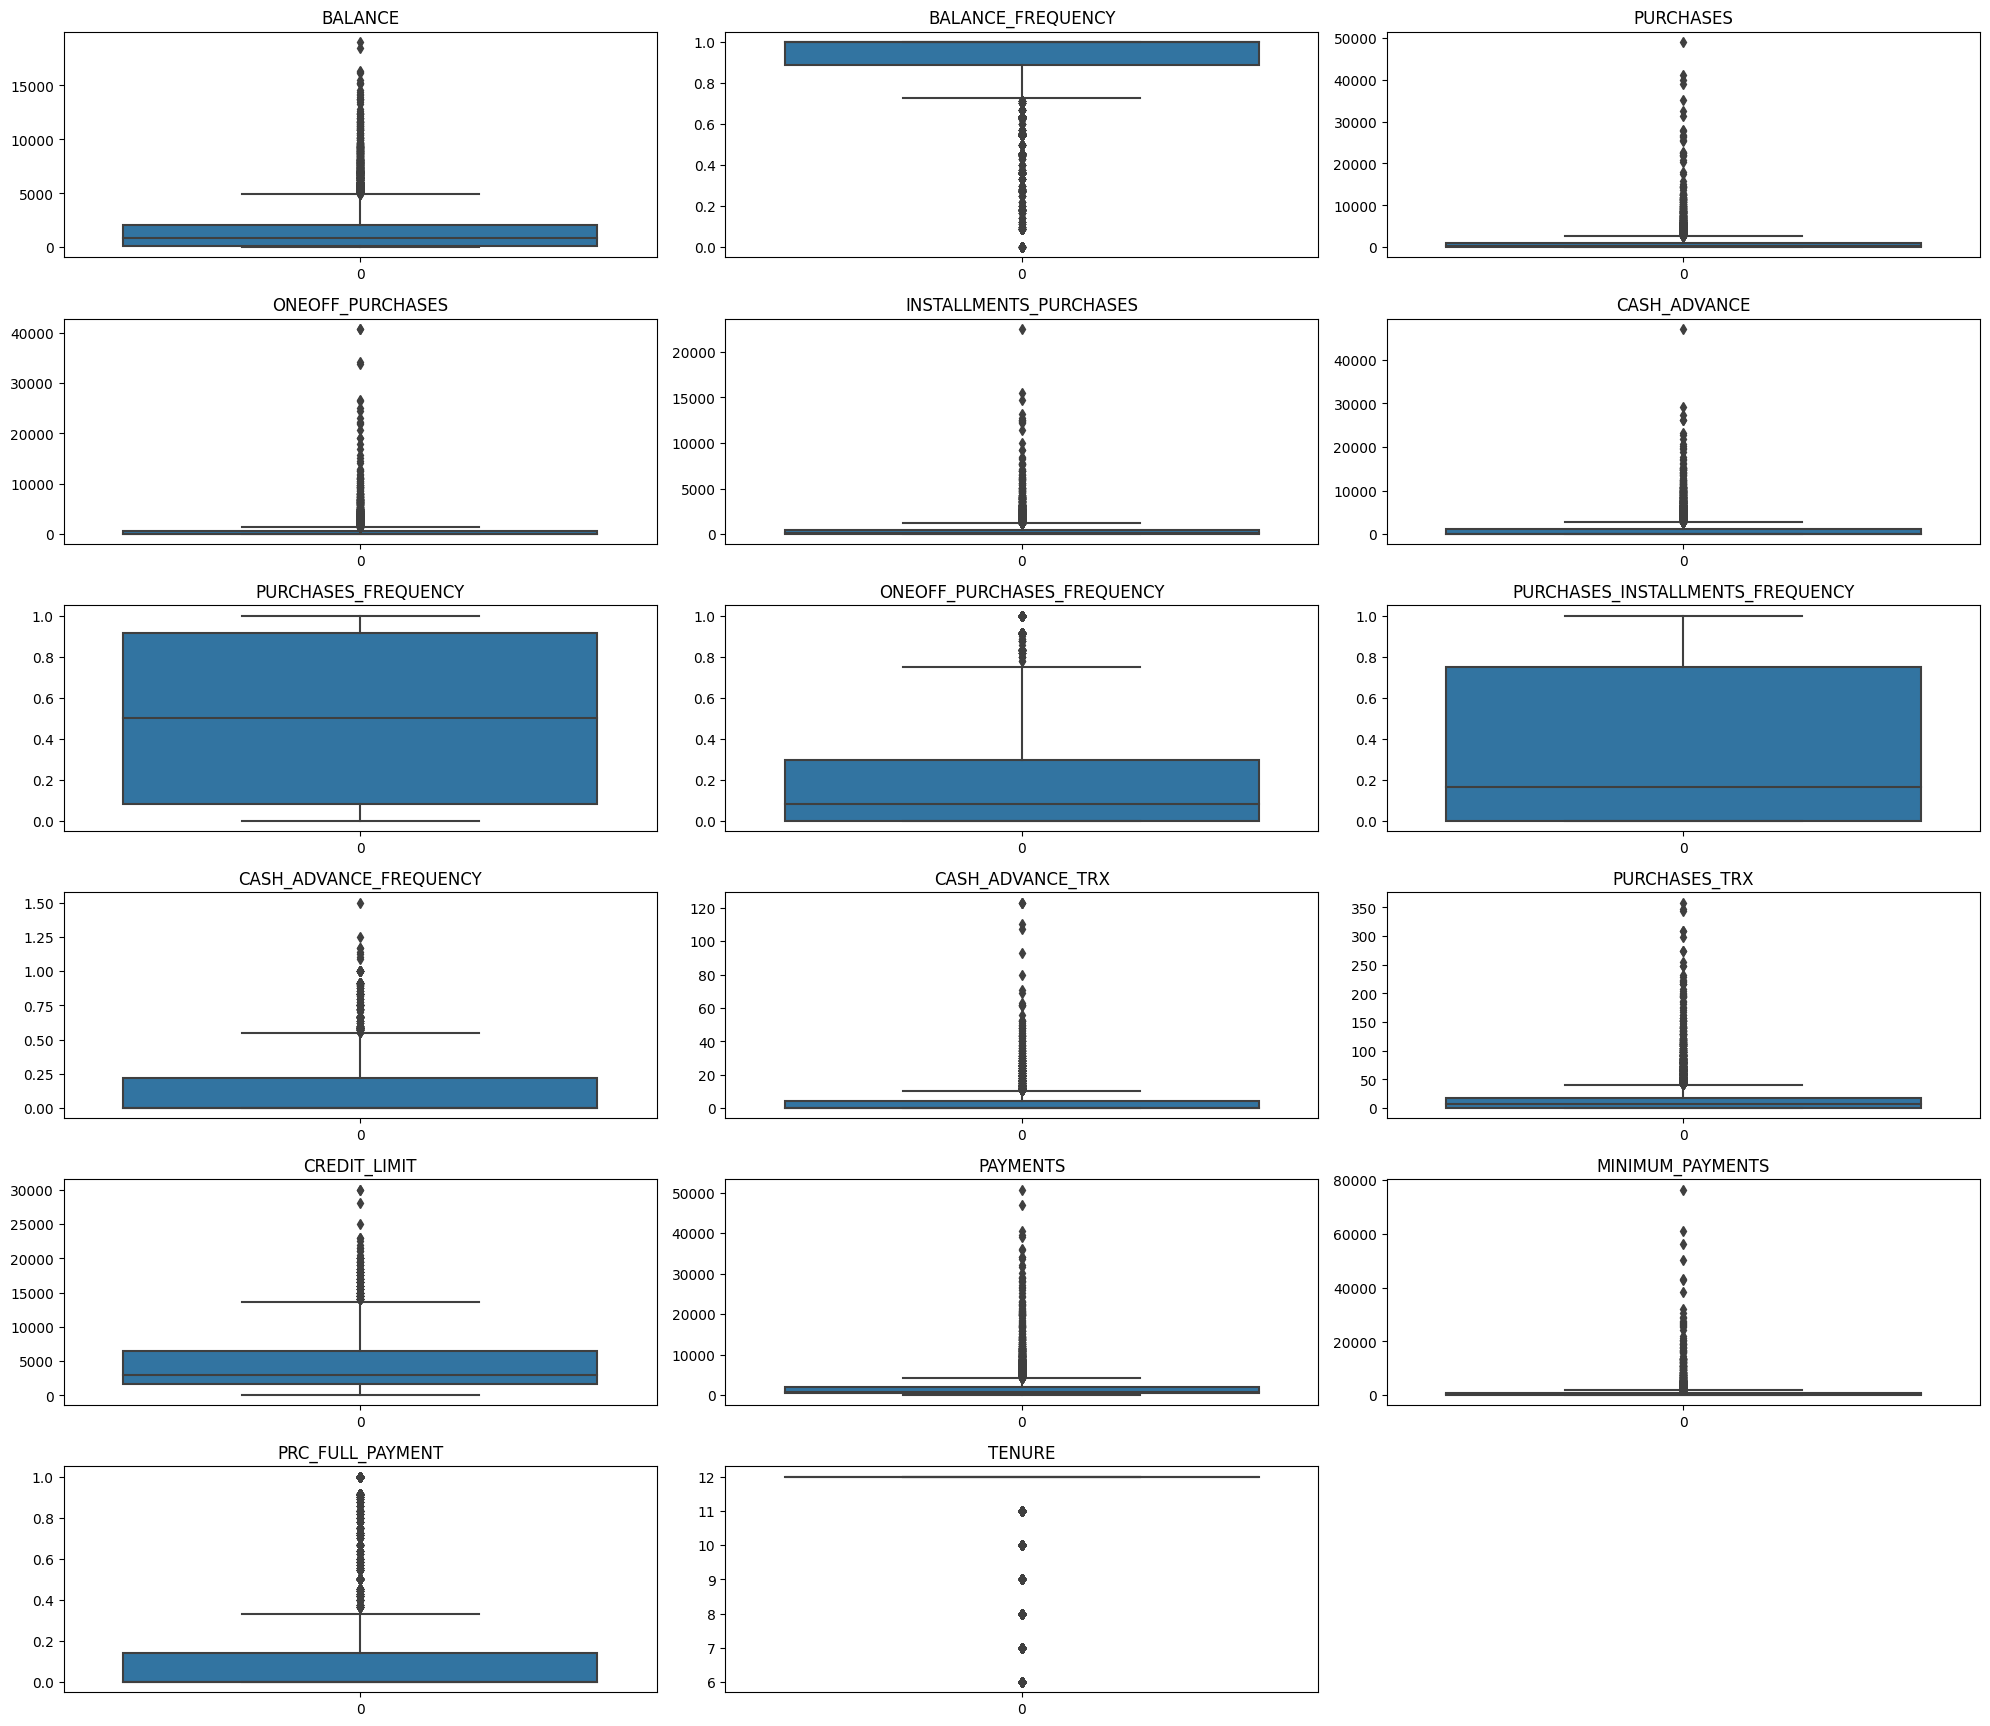

In [9]:
# check for outliers 
fig= plt.subplots(figsize=(20,20))
for i in range (len(data.columns)):
    plt.subplot(7,3,i+1)
    ax=  sns.boxplot(data[data.columns[i]])
    plt.title(data.columns[i])
    plt.tight_layout()

In [10]:
def outliers_handeling(df):

  numerical_columns = [col for col in df.columns if df[col].dtype != 'object']

  for col in numerical_columns:
    percentiles = df[col].quantile([0.05,0.95]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]

  return df

In [11]:
cleaned_df = outliers_handeling(data)
cleaned_df

<ipython-input-10-df109c48f851>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
<ipython-input-10-df109c48f851>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
<ipython-input-10-df109c48f851>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
<ipython-input-10-df109c48f851>:8: Setti

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,4647.169122,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,89.988924,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,73.282006,0.500000,8
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,8
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,89.988924,82.418369,0.250000,8
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,1000.0,89.988924,73.282006,0.250000,8


In [12]:
# check for  missing value
round(data.isnull().sum()*100/data.shape[0],2)

BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [13]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(cleaned_df)
imputed_data = pd.DataFrame(imputer.transform(cleaned_df), columns=cleaned_df.columns)
print("Number of missing values after imputation:\n", imputed_data.isnull().sum()*100/data.shape[0],2)

Number of missing values after imputation:
 BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64 2


In [14]:
colnames =imputed_data.columns
new_data = pd.DataFrame(imputed_data, columns = colnames)
new_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,89.988924,643.387510,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0




> # **Model Building**



In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)
scaled_data = pd.DataFrame(scaled_data, columns=new_data.columns)
scaled_data[:5]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.835783,-0.297904,-0.662389,-0.600394,-0.483999,-0.605707,-0.806490,-0.678661,-0.707313,-0.722502,-0.636381,-0.680426,-1.049826,-0.800356,-0.704768,-0.525551,0.378995
1,1.036257,0.118296,-0.749136,-0.600394,-0.675642,2.838929,-1.221758,-0.678661,-0.916995,0.692644,0.295454,-0.807798,0.821159,1.643245,0.599971,0.234227,0.378995
2,0.617437,0.534496,-0.046095,0.435900,-0.675642,-0.605707,1.269843,2.673451,-0.916995,-0.722502,-0.636381,-0.043563,0.977074,-0.537116,-0.022523,-0.525551,0.378995
3,0.126875,-1.130304,0.613899,1.408742,-0.675642,-0.453170,-1.014125,-0.399319,-0.916995,-0.250789,-0.403422,-0.744112,0.977074,-0.870392,0.000000,-0.525551,0.378995
4,-0.375812,0.534496,-0.734587,-0.578948,-0.675642,-0.605707,-1.014125,-0.399319,-0.916995,-0.722502,-0.636381,-0.744112,-0.987460,-0.501872,-0.557512,-0.525551,0.378995


1- Kmeans model 

In [22]:
def kmeans_cluster_tuning(data, max_clusters):
    silhouette_scores = []
    ch_scores = []
    db_scores = []

    for k in range(2, max_clusters+1):
        # Build KMeans model
        model = KMeans(n_clusters=k, random_state=42)
        # Train KMeans model
        model.fit(data)
        # Calculate Silhouette Score
        silhouette_scores.append(silhouette_score(data, model.labels_))
        # Calculate Calinski-Harabasz Score
        ch_scores.append(calinski_harabasz_score(data, model.labels_))
        # Calculate Davies-Bouldin Score
        db_scores.append(davies_bouldin_score(data, model.labels_))

    # Find best number of clusters
    best_silhouette_score = max(silhouette_scores)
    best_ch_score = max(ch_scores)
    best_db_score = min(db_scores)

    best_k_silhouette = silhouette_scores.index(best_silhouette_score) + 2
    best_k_ch = ch_scores.index(best_ch_score) + 2
    best_k_db = db_scores.index(best_db_score) + 2

    # Print results
    print("Best Silhouette Score:", best_silhouette_score, "with k =", best_k_silhouette)
    print("Best Calinski-Harabasz Score:", best_ch_score, "with k =", best_k_ch)
    print("Best Davies-Bouldin Score:", best_db_score, "with k =", best_k_db)

    # Return best number of clusters
    return best_k_silhouette, best_k_ch, best_k_db

In [23]:
kmeans_cluster_tuning(scaled_data,21)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Best Silhouette Score: 0.263690402014006 with k = 2
Best Calinski-Harabasz Score: 2462.516803464205 with k = 3
Best Davies-Bouldin Score: 1.4669669977310096 with k = 7


(2, 3, 7)

In [49]:
# Instantiate the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)
# Fit the data to the KMeans model
kmeans.fit(scaled_data)
#Predict the cluster labels for the data
labels = kmeans.predict(scaled_data)
# Get the cluster centers
centers = kmeans.cluster_centers_
Sil_score_km = silhouette_score(scaled_data,labels)
CH_score_km = calinski_harabasz_score(scaled_data,labels)
dbs_score_km = davies_bouldin_score(scaled_data,labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



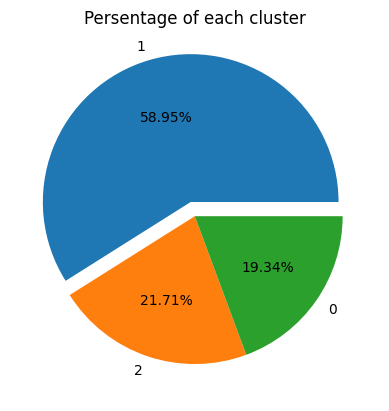

In [48]:
# Calculate the size of each cluster
cluster_sizes =pd.Series(labels).value_counts()
plt.pie(cluster_sizes,labels = cluster_sizes.index,autopct='%.2f%%',explode=[0.1,0,0])
plt.title(f'Persentage of each cluster')
plt.show()

2- Hierarchical model  [AgglomerativeClustering] 

In [26]:
def evaluate_clusters_hierarchical(X, max_k, linkage='ward'):
    # X: dataset to cluster
    # max_k: maximum number of clusters to evaluate
    # linkage: linkage criterion for hierarchical clustering
    
    results = []
    
    for k in range(2, max_k+1):
        # Fit hierarchical clustering on the dataset
        hc = AgglomerativeClustering(n_clusters=k, linkage=linkage).fit(X)
        # Get labels and calculate metrics
        labels = hc.labels_
        sh_score = silhouette_score(X, labels)
        ch_score = calinski_harabasz_score(X, labels)
        db_score = davies_bouldin_score(X, labels)
        # Append results to list
        results.append((k, sh_score, ch_score, db_score))
    
    # Print results
    print("Number of Clusters\t   Silhouette Score\t  Calinski-Harabasz Score\t  Davies-Bouldin Score")
    for k, sh_score, ch_score, db_score in results:
       print(f"{k}\t\t\t{sh_score:.3f}\t\t{ch_score:.3f}\t\t\t{db_score:.3f}")

    
    return results

In [27]:
results = evaluate_clusters_hierarchical(scaled_data, 10, linkage='ward')

Number of Clusters	   Silhouette Score	  Calinski-Harabasz Score	  Davies-Bouldin Score
2			0.173		1778.165			2.004
3			0.168		1566.384			1.746
4			0.118		1459.973			1.702
5			0.132		1389.655			1.899
6			0.143		1342.250			1.666
7			0.149		1294.764			1.672
8			0.126		1249.588			1.847
9			0.135		1209.760			1.746
10			0.139		1160.931			1.675


In [28]:
results_df = pd.DataFrame(results,columns=['k', 'Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'])

In [29]:
fig = px.line(results_df, x='k', y=['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
              title='Clustering Evaluation Metrics')
fig.show()

In [50]:
# Instantiate the AgglomerativeClustering model with 2 clusters
agg_clustering = AgglomerativeClustering(n_clusters=2)

# Fit the data to the AgglomerativeClustering model
agg_clustering.fit(scaled_data)

# Predict the cluster labels for the data
labels_agg = agg_clustering.labels_
Sil_score_agg = silhouette_score(scaled_data,labels_agg)
CH_score_agg = calinski_harabasz_score(scaled_data,labels_agg)
dbs_score_agg = davies_bouldin_score(scaled_data,labels_agg)

In [53]:
# Calculate the size of each cluster
cluster_sizes =pd.Series(labels_agg).value_counts()
fig = px.bar(cluster_sizes, x=cluster_sizes.index, y=cluster_sizes.values,color=cluster_sizes.index)
fig.show()

3- DBSCAN model 

In [55]:
def tune_dbscan_parameters_silhouette(data, eps_range, min_samples_range):
    # Define the parameter grid for the grid search
    param_grid = {'eps': eps_range, 'min_samples': min_samples_range}

    # Initialize variables to store best parameter values and silhouette score
    best_eps = None
    best_min_samples = None
    best_silhouette_score = -1

    # Iterate over all parameter combinations in the parameter grid
    for params in ParameterGrid(param_grid):
        # Create a DBSCAN model with the current parameter values
        dbscan = DBSCAN(**params)

        # Fit the data to the DBSCAN model
        dbscan.fit(data)

        # Calculate the silhouette score for the current clustering
        labels = dbscan.labels_
        if len(set(labels)) > 1:
            score = silhouette_score(data, labels)
        else:
            score = -1

        # Update the best parameter values and silhouette score if necessary
        if score > best_silhouette_score:
            best_silhouette_score = score
            best_eps = params['eps']
            best_min_samples = params['min_samples']

    # Return the best parameter values
    return best_eps, best_min_samples

In [56]:
eps_range = np.linspace(0.1, 1.0, 10)
min_samples_range = np.arange(2, 13)

# Tune the DBSCAN parameters
best_eps,best_min_samples = tune_dbscan_parameters_silhouette(scaled_data,eps_range,min_samples_range)

# Print the best parameter values
print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)

Best eps: 1.0
Best min_samples: 9


In [60]:
# Create DBSCAN model
dbscan = DBSCAN(eps=1.0, min_samples=9)
# Train model
dbscan.fit(scaled_data)
# Get cluster labels
labels_db = dbscan.labels_

slc_db =silhouette_score(scaled_data,labels_db)
chc_db =calinski_harabasz_score(scaled_data,labels_db)
dbs_db =davies_bouldin_score(scaled_data,labels_db)

In [61]:
best_model = pd.DataFrame({'Model_Name':['kmeans','agg_clustering','dbscan'],
                           'Sil_score':[Sil_score_km,Sil_score_agg,slc_db],
                           'CH_score':[CH_score_km,CH_score_agg,chc_db], 
                           'dbs_score':[dbs_score_km,dbs_score_agg,dbs_db]})
best_model

,Model_Name,Sil_score,CH_score,dbs_score
0,kmeans,0.238098,2462.518953,1.505080
1,agg_clustering,0.172535,1778.165083,2.003628
2,dbscan,-0.128391,154.876312,1.370921






```
Silhouette_score : between -1 and 1 

calisnki_score : the higher the better

davies_score : the lower the better
```





# **Principal component Analysis**

In [69]:
def find_important_features(X, n_components):
    """
    dataset ---->> X  
    the number of principal components ----->> n_components
    returns a DataFrame with the most important features based on PCA.
    """
    # Fit a PCA model with n_components
    pca = PCA(n_components=n_components)
    pca.fit(X)

    # Get the explained variance ratio for each principal component
    explained_variance_ratio = pca.explained_variance_ratio_

    # Get the loadings for each feature on each principal component
    loadings = pca.components_

    # Calculate the importance score for each feature as the sum of the squared loadings
    importance_score = np.sum(loadings**2, axis=0)

    # Sort the features by importance score and return a DataFrame with the results
    feature_names = X.columns
    sorted_indices = np.argsort(importance_score)[::-1]
    sorted_importance_score = importance_score[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]
    result_df = pd.DataFrame({'Feature': sorted_feature_names, 'Importance Score': sorted_importance_score})

    return result_df

In [70]:
find_important_features(scaled_data,2)

,Feature,Importance Score
0,BALANCE,0.181857
1,CASH_ADVANCE,0.173453
2,CASH_ADVANCE_TRX,0.169617
3,CASH_ADVANCE_FREQUENCY,0.168723
4,PURCHASES,0.162896
5,PURCHASES_TRX,0.159854
6,PURCHASES_FREQUENCY,0.135740
7,MINIMUM_PAYMENTS,0.119938
8,INSTALLMENTS_PURCHASES,0.113948
9,ONEOFF_PURCHASES,0.113054




> # **Conclusion :**

It seems that for this data set, k_Means performed better and was able to cluster better. Using this algorithm, customers are divided into three groups as follows

cluster0:

low balance, low purchase, low cash advance, low payment and low minimum payment, medium credit cart and medium purches frequency.


---


cluster1:

low purchase, medium balance,cash advance,payment and minimum payment, high credit cart


---



cluster2:

low cash advance,payment, medium balance,purchase,payment, high credit cart, purchase frequency and purchase installment freguency.